In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("all_stocks_5yr.csv")
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
data["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [4]:
len(data["Name"].unique())

505

In [5]:
fb_stock_data = data[data["Name"] == "FB"]

In [6]:
fb_stock_data.head()

,date,open,high,low,close,volume,Name
218609,2013-02-08,28.89,29.17,28.51,28.5450,37662614,FB
218610,2013-02-11,28.61,28.68,28.04,28.2600,36979533,FB
218611,2013-02-12,27.67,28.16,27.10,27.3700,93417215,FB
218612,2013-02-13,27.36,28.32,27.31,27.9075,50100805,FB
218613,2013-02-14,28.02,28.63,28.01,28.5000,35581045,FB


In [7]:
fb_stock_data = fb_stock_data[["date", "close"]]

In [8]:
fb_stock_data.head()

,date,close
218609,2013-02-08,28.5450
218610,2013-02-11,28.2600
218611,2013-02-12,27.3700
218612,2013-02-13,27.9075
218613,2013-02-14,28.5000


In [10]:
fb_stock_data = fb_stock_data.set_index("date")

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text xticklabel objects>)

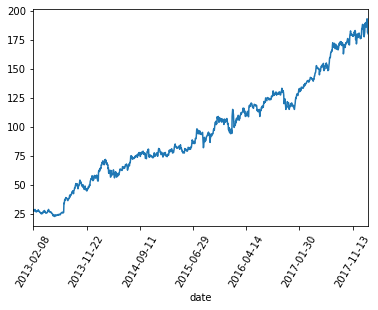

In [12]:
fb_stock_data["close"].plot()
plt.xticks(rotation = 60)

In [13]:
120 - 100

20

In [14]:
20 / 100

0.2

In [15]:
# From 100 to 120
100 * 0.2

20.0

In [16]:
fb_stock_data["close"]

date
2013-02-08     28.5450
2013-02-11     28.2600
2013-02-12     27.3700
2013-02-13     27.9075
2013-02-14     28.5000
                ...   
2018-02-01    193.0900
2018-02-02    190.2800
2018-02-05    181.2600
2018-02-06    185.3100
2018-02-07    180.1800
Name: close, Length: 1259, dtype: float64

In [18]:
fb_stock_data["returns"] = fb_stock_data["close"] / fb_stock_data["close"].shift(1) - 1

In [19]:
fb_stock_data.head()

,close,returns
date,,
2013-02-08,28.5450,NaN
2013-02-11,28.2600,-0.009984
2013-02-12,27.3700,-0.031493
2013-02-13,27.9075,0.019638
2013-02-14,28.5000,0.021231


In [20]:
returns = fb_stock_data["returns"][1:]

In [23]:
added_1 = returns + 1

In [24]:
effective = 1
for i in added_1:
    effective *= i

In [25]:
effective

6.312138728323681

In [27]:
effective = pow(effective, 1/len(returns)) - 1

In [29]:
effective = effective * 100 

In [30]:
effective

0.14656792293803456

In [32]:
np.mean(returns) * 100

0.1660421665891662

In [33]:
volatility = np.std(returns, ddof = 1)

In [35]:
volatility * 100

2.009740461893613

In [36]:
benchmark = 0.08

In [37]:
sharpe = (effective - benchmark) / volatility

In [43]:
volatility

0.02009740461893613

In [47]:
def compute_sharpe(symbol):
    stock_data = data[data["Name"] == symbol][["date", "close"]]
    stock_data["returns"] = stock_data["close"] / stock_data["close"].shift(1) - 1
    returns = stock_data["returns"][1:]
    
    added = returns + 1
    
    effective = 1
    for i in added:
        effective *= i
    
    effective = pow(effective, 1/len(returns)) - 1 
    
    effective = effective * 100 
    
    volatility = np.std(returns, ddof = 1)
    benchmark = 0.08
    sharpe = (effective - benchmark) / volatility
    return sharpe 

In [48]:
compute_sharpe("FB")

3.3122646530842634

In [49]:
compute_sharpe("ABBV")

0.643893183197735

In [50]:
compute_sharpe("QCOM")

-5.092338303738163